# Библиотеки

In [4]:
import os
import sklearn
import pandas as pd
import numpy as np
from sklearn.datasets import load_files
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import RFECV

from sklearn.manifold import TSNE

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Загрузка данных и их обработка

In [5]:
def load_dataset (path):
    re=[]
    clas=[]
    for root, dirs, files in os.walk(path):  
        if len(dirs)==0:
            for filename in files:
                with open(os.path.join(root,filename), 'r', encoding='utf-8' ) as f:
                    re.append(f.read())
                if os.path.basename(root) == 'neg':
                    clas.append(0)
                else:
                    clas.append(1)
    return re,clas 


In [7]:
path1 = "C:\\Users\\vanin\\Documents\\институт\\3 курс\\пад\\pad\\train"
X_train,Y_train = load_dataset(path1)      

print(X_train[24999])

Working-class romantic drama from director Martin Ritt is as unbelievable as they come, yet there are moments of pleasure due mostly to the charisma of stars Jane Fonda and Robert De Niro (both terrific). She's a widow who can't move on, he's illiterate and a closet-inventor--you can probably guess the rest. Adaptation of Pat Barker's novel "Union Street" (a better title!) is so laid-back it verges on bland, and the film's editing is a mess, but it's still pleasant; a rosy-hued blue-collar fantasy. There are no overtures to serious issues (even the illiteracy angle is just a plot-tool for the ensuing love story) and no real fireworks, though the characters are intentionally a bit colorless and the leads are toned down to an interesting degree. The finale is pure fluff--and cynics will find it difficult to swallow--though these two characters deserve a happy ending and the picture wouldn't really be satisfying any other way. *** from ****


In [10]:
# path2 = "C:\\Users\\vanin\\Documents\\институт\\3 курс\\пад\\pad\\test"
# X_test,Y_test = load_dataset(path2)   

print(X_test[0])

Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.


In [5]:
X = X_test + X_train
total=0
ln = []
for i in X:
    ln.append(len(i))
    total += len(i)
mean = total / len(X)
mn = min(ln)
mx = max(ln)
print(mn, mx)
print(mean)

32 13704
1309.43102


In [5]:
path3 = "C:\\Users\\vanin\\Documents\\институт\\3 курс\\пад\\aclImdb\\train\\unsup"
X_vocab,t = load_dataset(path3)   
print(len(X_vocab))

50000


# Предварительная обработка датасета

In [8]:
stop_words=stopwords.words('english')
sw_list = ['movie','movi','film', 'br', 'wa', 'ha', 'hi', 'thi']
stop_words.extend(sw_list)
stemmer=PorterStemmer()
lemmatizer = WordNetLemmatizer()


def text_processing(spisok_text):
    cleand_text = []
    for i in spisok_text:
        cleaned = re.sub(r"\w+n't |not |no ","not", i)
        cleaned = re.sub('[^A-Za-z]+',' ',cleaned)
        lower = cleaned.lower()
        tokens = nltk.word_tokenize(lower)
        
        # стематизация - основа
        #stemmed = [stemmer.stem(word) for word in tokens]    
        # лемматизация - корень (существующий) 
        lemm = [lemmatizer.lemmatize(word) for word in tokens]
        
        text_with_out_stopwords = [word for word in lemm if word not in stop_words]
        review = ' '.join(text_with_out_stopwords)
        cleand_text.append(review)
    return cleand_text

In [15]:
stop_words=stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
reviews_train = text_processing(X_train)

In [ ]:
reviews_test = text_processing(X_test)

In [19]:
reviews_vocab = text_processing(X_vocab)

# Сохранение датасета в файл

In [10]:
film_reviews_train = pd.DataFrame({"review": reviews_train,"class":Y_train})
film_reviews_train.to_csv('film-stem-train.csv', index=False)

In [20]:
film_reviews_test = pd.DataFrame({"review": reviews_test,"class":Y_test})
film_reviews_test.to_csv('film-stem-test.csv', index=False)

In [22]:
film_reviews_vocab = pd.DataFrame({"review": reviews_vocab})
film_reviews_vocab.to_csv('film-stem-vocab.csv', index=False)

# Загрузка обработанных датасетов

In [11]:
film_reviews_train = pd.read_csv("film-stem-train.csv")
film_reviews_train.review[24999]

'working class romantic drama director martin ritt unbelievable come yet moment pleasure due mostly charisma star jane fonda robert de niro terrific widow notmove illiterate closet inventor probably guess rest adaptation pat barker novel union street better title laid back verge bland editing mess still pleasant rosy hued blue collar fantasy notovertures serious issue even illiteracy angle plot tool ensuing love story notreal firework though character intentionally bit colorless lead toned interesting degree finale pure fluff cynic find difficult swallow though two character deserve happy ending picture notreally satisfying way'

In [22]:
film_reviews_test = pd.read_csv("film-stem-test.csv")
film_reviews_test.review[24999]

'seen thi stori befor kid boy troubl past join militari face hi past fall love becom man mentor thi time play perfectli kevin costner ordinari man common everyday problem live extraordinari convict save live lose hi team take teach posit train next gener hero young troubl recruit play kutcher hi scene local love interest tad stiff notgener enough heat melt butter compliment costner well never realli understood sela ward neglect wife felt want costner quit concern hi safeti oppos selfish need presenc screen pleasur two unaccredit star thi coast guard sea power forc notb taken grant real life thi slow spot could use wast minut strengthen charact relationship still work rescu scene intens well edit provid maximum impact thi earn audienc applaus applaus two son'

In [23]:
film_reviews_vocab = pd.read_csv("film-lem-vocab.csv")
film_reviews_vocab

,review
0,admit great majority released say notfor dozen...
1,take low budget inexperienced actor doubling p...
2,everybody ha seen back future right whether li...
3,doris day wa icon beauty singing acting warm v...
4,series silly fun loving wa big year doris day ...
...,...
49995,delightfully awful made david giancola guy lon...
49996,watching time chaser obvious wa made bunch fri...
49997,beginning see member troma team company uwe bo...
49998,wa incredible ever since saw told wife see wa ...


In [13]:
film_reviews = pd.concat([film_reviews_train, film_reviews_test],ignore_index=True)
film_reviews

,review,class
0,story man ha unnatural feeling pig start openi...,0
1,airport start brand new luxury plane loaded va...,0
2,lacked something notput finger first charisma ...,0
3,sorry everyone know supposed art wow handed gu...,0
4,wa little parent took along theater see interi...,0
...,...,...
49995,wa extraordinarily impressed one best sport ev...,1
49996,although nota golf fan attended sneak preview ...,1
49997,start edge love viewer transported striking wo...,1
49998,complexity subtlety make one thought provoking...,1


# Облака слов

In [12]:
def cloud(data):
    text = ''.join(data)
    cloud = WordCloud(width = 4000, height = 3000).generate(text)
    plt.imshow(cloud)
    plt.axis('off')
    
def most_frequently_used_words(data):
    vectorizer = CountVectorizer(max_features=50)  
    x_bag = vectorizer.fit_transform(data).toarray()
    wf = dict(zip(vectorizer.get_feature_names(), x_bag.sum(axis=0)))
    frec = [(k,v) for k, v in sorted(wf.items(), key=lambda item: item[1])]
    return frec

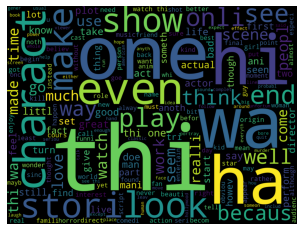

In [31]:
cloud(film_reviews_train['review'])

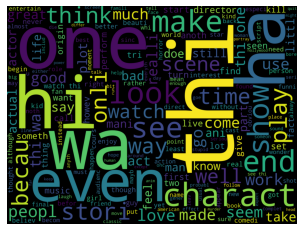

In [32]:
cloud(film_reviews_test['review'])

In [13]:
x_pos = film_reviews_train['review'][film_reviews_train['class'] == 1]
x_neg = film_reviews_train['review'][film_reviews_train['class'] == 0]

[('look', 2698), ('ever', 2707), ('part', 2725), ('find', 2738), ('come', 2777), ('say', 2802), ('take', 2803), ('seen', 3013), ('doe', 3073), ('work', 3098), ('end', 3141), ('performance', 3167), ('never', 3223), ('could', 3237), ('actor', 3240), ('little', 3339), ('still', 3355), ('watch', 3372), ('think', 3413), ('go', 3461), ('man', 3476), ('thing', 3512), ('many', 3731), ('two', 3733), ('made', 3779), ('year', 4055), ('best', 4322), ('way', 4454), ('love', 4514), ('people', 4538), ('much', 4552), ('even', 4559), ('first', 4756), ('show', 4829), ('really', 4929), ('scene', 4993), ('life', 5102), ('get', 5282), ('would', 5397), ('make', 5472), ('also', 5548), ('see', 6151), ('great', 6359), ('well', 6461), ('character', 7067), ('story', 7472), ('good', 7700), ('time', 8325), ('like', 8814), ('one', 13801)]


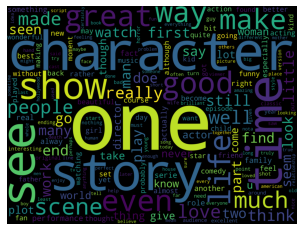

In [14]:
cloud(x_pos)
print(most_frequently_used_words(x_pos))

[('watching', 2628), ('come', 2719), ('guy', 2728), ('director', 2737), ('year', 2823), ('know', 2882), ('doe', 2884), ('many', 2885), ('something', 2912), ('life', 2919), ('nothing', 2983), ('seen', 3033), ('little', 3096), ('two', 3168), ('ever', 3212), ('never', 3259), ('better', 3309), ('watch', 3332), ('say', 3361), ('think', 3400), ('end', 3411), ('also', 3604), ('actor', 3611), ('show', 3647), ('look', 3655), ('go', 3774), ('acting', 4018), ('way', 4161), ('plot', 4174), ('well', 4261), ('first', 4305), ('made', 4488), ('could', 4686), ('thing', 4704), ('much', 4765), ('people', 4839), ('see', 5246), ('really', 5567), ('scene', 5594), ('story', 5634), ('make', 6003), ('even', 6004), ('get', 6141), ('would', 7029), ('character', 7045), ('bad', 7218), ('good', 7233), ('time', 7571), ('like', 11075), ('one', 12927)]


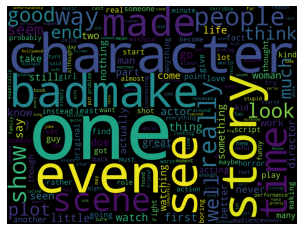

In [15]:
cloud(x_neg)
print(most_frequently_used_words(x_neg))

# tsne

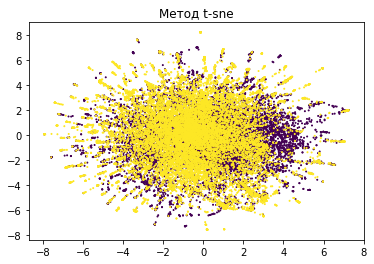

In [37]:
embed = TSNE(perplexity=90)
X_embedded = embed.fit_transform(x_rfecv_train)
plt.scatter(X_embedded[:,0],X_embedded[:,1], c=film_reviews_train['class'], s=1)
plt.title('Метод t-sne')
plt.show()

# fast text

In [24]:
tokens = film_reviews.review.apply(lambda x: x.split())
tokens_vocab = film_reviews_vocab.review.apply(lambda x: x.split())

# from gensim.models.fasttext import FastText
# model = FastText(vector_size=100, window=20, min_count=1)
# model.build_vocab(corpus_iterable=tokens)

# model.train(corpus_iterable=tokens, total_examples=len(tokens), epochs=40)

In [16]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return tokens

english_words = load_vectors('C:\\Users\\vanin\\Downloads\\wiki-news-300d-1M.vec\\wiki-news-300d-1M.vec')
english_words

{',': <map at 0x25e21a79250>,
 'the': <map at 0x25e21a79f70>,
 '.': <map at 0x25e21a79f10>,
 'and': <map at 0x25e21a79100>,
 'of': <map at 0x25e21a795b0>,
 'to': <map at 0x25e21a793d0>,
 'in': <map at 0x25e21a85b50>,
 'a': <map at 0x25e21a85ac0>,
 '"': <map at 0x25e21a85370>,
 ':': <map at 0x25e21a85a90>,
 ')': <map at 0x25e21a858b0>,
 'that': <map at 0x25e21a85c40>,
 '(': <map at 0x25e21a85e50>,
 'is': <map at 0x25e21a85d00>,
 'for': <map at 0x25e21a85670>,
 'on': <map at 0x25e21a85310>,
 '*': <map at 0x25e21a85070>,
 'with': <map at 0x25e21a85f40>,
 'as': <map at 0x25e21a85d90>,
 'it': <map at 0x25e21a856a0>,
 'The': <map at 0x25e21a85b80>,
 'or': <map at 0x25e21a85730>,
 'was': <map at 0x25e21a948b0>,
 "'": <map at 0x25e21a94790>,
 "'s": <map at 0x25e21a942b0>,
 'by': <map at 0x25e21a947c0>,
 'from': <map at 0x25e21a94040>,
 'at': <map at 0x25e21a94460>,
 'I': <map at 0x25e21a94400>,
 'this': <map at 0x25e21a94550>,
 'you': <map at 0x25e21a94640>,
 '/': <map at 0x25e21a94670>,
 'are

In [25]:
from gensim.models.fasttext import FastText
# import gensim.downloader as download_api

# corpus = download_api.load('text8')

# fastText_model = FastText(corpus, vector_size=100, workers=4)
fastText_model = FastText(vector_size=100, window=20, min_count=1)
# model = FastText(vector_size=300, window=20, min_count=1)
# model.build_vocab(corpus_iterable=english_words)

# model.train(corpus_iterable=tokens, total_examples=len(tokens), epochs=40)

In [26]:
fastText_model.build_vocab(tokens_vocab)
fastText_model.build_vocab(tokens, update=True)
fastText_model.train(corpus_iterable=tokens, total_examples=len(tokens), epochs=40)

(226532170, 235310240)

In [27]:
fastText_model.wv.most_similar('good')

[('osgood', 0.7879747748374939),
 ('bidgood', 0.7035183906555176),
 ('reallynotgood', 0.7008407711982727),
 ('great', 0.6867240071296692),
 ('notbad', 0.6668160557746887),
 ('agreat', 0.6463890671730042),
 ('nice', 0.6461079120635986),
 ('decent', 0.6401650905609131),
 ('goodun', 0.6390722393989563),
 ('goodrem', 0.6383010745048523)]

In [28]:
def fasttest_representation(tokens, ft_model):
    return pd.Series([ft_model.wv[token] for token in tokens if token in ft_model.wv]).mean()

In [29]:
X = tokens.apply(fasttest_representation, args=[fastText_model])
X = pd.DataFrame.from_dict(dict(zip(X.index, X.values))).transpose()

In [30]:
x_train = X[:25000]
x_test =X[25000:]
print(len(x_test))
print(len(x_train))

y_train = film_reviews['class'][:25000]
y_test = film_reviews['class'][25000:]
print(len(y_train))
print(len(y_test))

25000
25000
25000
25000


# Мешок слов

In [27]:
vectorizer = CountVectorizer(max_features=15000)

x_bag_train = vectorizer.fit_transform(film_reviews_train['review']).toarray()


x_bag_test = vectorizer.transform(film_reviews_test['review']).toarray()

print(x_bag_train.shape)

(25000, 15000)


In [28]:
words = vectorizer.get_feature_names()
words = np.asarray (words)
words

array(['aaa', 'aag', 'aam', ..., 'zucker', 'zulu', 'zuniga'], dtype='<U16')

## TFIDF

In [29]:
tfidfconverter = TfidfTransformer()
x_tfidf_train = tfidfconverter.fit_transform(x_bag_train).toarray()
x_tfidf_test = tfidfconverter.fit_transform(x_bag_test).toarray()

In [30]:
print(x_tfidf_train.shape)

(25000, 15000)


## RFECV

In [7]:
logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, min_features_to_select = 500, step=500, cv=3, n_jobs = 6, scoring= 'accuracy')
rfecv.fit(x_tfidf_train, film_reviews_train['class'])
x_rfecv_train = rfecv.transform(x_tfidf_train)
x_rfecv_test = rfecv.transform(x_tfidf_test)  

x_rfecv_train.shape

(25000, 1500)

In [8]:
rfecv.grid_scores_

array([0.85747994, 0.85891997, 0.86048002, 0.86024004, 0.86028005,
       0.85948001, 0.85860004, 0.85936001, 0.85952003, 0.85955997,
       0.85887997, 0.85887996, 0.85819995, 0.85843996, 0.85839997,
       0.85819997, 0.85799999, 0.85807999, 0.85839999, 0.85800002,
       0.85776004, 0.85756004, 0.85736004, 0.85712003, 0.85692004,
       0.85704005, 0.85688004, 0.85696004, 0.85688004, 0.85684004])

In [24]:
a = list(range(3000,5500,500))
c = list(range(3000,500*(len(rfecv.grid_scores_)+1),500))
c

[]

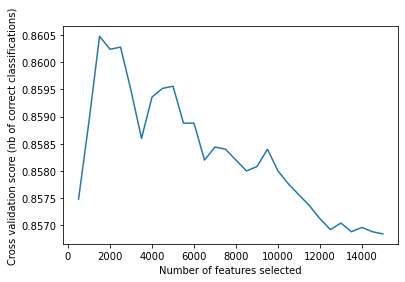

In [12]:
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.plot(range(500,15500,500), rfecv.grid_scores_)
plt.show()

In [9]:
a = rfecv.support_
words=vectorizer.get_feature_names()
words = np.asarray (words)
words =words[np.where(a == True)]
words

array(['abbey', 'abbot', 'abc', ..., 'zp', 'zu', 'zulu'], dtype='<U16')

# Классификация

In [31]:
x_train = x_tfidf_train
x_test = x_tfidf_test
y_train = film_reviews_train['class']
y_test = film_reviews_test['class']

### Логистическая регрессия 

In [32]:
LR_model = LogisticRegression(max_iter=1000,C=5.0)
LR_model.fit(x_train,y_train)      #x_rfecv_train, film_reviews_train['class'])
LR_predict = LR_model.predict(x_test)
print('логистическая регрессия')
print(classification_report(y_test, LR_predict))     #film_reviews_test['class'], LR_predict))

c_range = [0.1, 1, 2]
parameters_LR = {'C': c_range,'penalty': ['l2', 'l1']}
LR_model_par = LogisticRegression()
LR_grid = GridSearchCV(LR_model_par, parameters_LR, cv=5)
LR_grid.fit(x_train, y_train)
LR_best = LR_grid.best_estimator_
LR_best_predict = LR_best.predict(x_test)
print('логистическая регрессия с параметрами')
print(LR_best.get_params())
print(classification_report(y_test, LR_best_predict))

логистическая регрессия
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     12500
           1       0.88      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



C:\Users\vanin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vanin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vanin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vanin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\vanin\anaconda3\lib\site-packages\sklearn\model_selection\_v

логистическая регрессия с параметрами
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     12500
           1       0.88      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



### Случайный лес 

In [32]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
RF_predict = RF.predict(x_test)
print('Случайный лес')
print(classification_report(y_test, RF_predict))

# features = RF.feature_importances_
# plt.figure()
# plt.bar(words[np.where(features > 0.005)], features[features > 0.005])
# plt.xticks(rotation=45)
# plt.show()



parameters = {'n_estimators': [50,100,200], 'max_depth': [5,10,20]}
RF_model = RandomForestClassifier()
RF_grid = GridSearchCV(RF_model, parameters)
RF_grid.fit(x_train, y_train)
RF_best = RF_grid.best_estimator_
RF_best_predict = RF_best.predict(x_test)
print('Случайный лес с параметрами')
print(RF_best.get_params())
print(classification_report(y_test, RF_best_predict))

# features_par = RF_best.feature_importances_
# plt.figure()
# plt.bar(words[np.where(features_par > 0.007)], features_par[features_par > 0.007])
# plt.xticks(rotation=45)
# plt.show()

Случайный лес
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     12500
           1       0.79      0.81      0.80     12500

    accuracy                           0.79     25000
   macro avg       0.80      0.79      0.79     25000
weighted avg       0.80      0.79      0.79     25000



KeyboardInterrupt: 

### k-ближайших соседей 

In [33]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train, y_train)
KNN_predict = KNN_model.predict(x_test)
print('к-ближайших соседей')
print(classification_report(y_test, KNN_predict))



# parameters = {'n_neighbors': [1,3,5,9] , 'metric': ['euclidean','chebyshev','cosine']}
# KNN_model_par = KNeighborsClassifier()
# KNN_grid = GridSearchCV(KNN_model_par, parameters, cv=3)
# KNN_grid.fit(x_train, y_train)
# KNN_best = KNN_grid.best_estimator_
# KNN_best_predict = KNN_best.predict(x_test)
# print('к-ближайших соседей с параметрами')
# print(KNN_best.get_params())
# print(classification_report(y_test, KNN_best_predict))

к-ближайших соседей
              precision    recall  f1-score   support

           0       0.66      0.65      0.66     12500
           1       0.66      0.66      0.66     12500

    accuracy                           0.66     25000
   macro avg       0.66      0.66      0.66     25000
weighted avg       0.66      0.66      0.66     25000



### Наивный баес

In [34]:
from sklearn.naive_bayes import GaussianNB
Gaussian_model = GaussianNB()
Gaussian_model.fit(x_train, y_train)
Gaussian_predict = Gaussian_model.predict(x_test)
print('наивный баес')
print(classification_report(y_test, Gaussian_predict))

наивный баес
              precision    recall  f1-score   support

           0       0.60      0.81      0.69     12500
           1       0.71      0.45      0.55     12500

    accuracy                           0.63     25000
   macro avg       0.65      0.63      0.62     25000
weighted avg       0.65      0.63      0.62     25000

